# Movie Classification Modeling

### Import Libraries & Load Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, plot_confusion_matrix, precision_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.pipeline import Pipeline

import time

# importing warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/

pd.set_option("display.max_rows",None,"display.max_columns",None)

In [8]:
df = pd.read_csv('./data/df_model.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
print(df.shape)
df.head()

(6587, 3027)


review_type  runtime  tomatometer_status  tomatometer_rating  \
0            1    119.0                   0                49.0   
1            1     90.0                   1                87.0   
2            1    122.0                   1                67.0   
3            1     80.0                   1                96.0   
4            0    143.0                   0                25.0   

   tomatometer_count  audience_status  audience_rating  audience_count  \
0              149.0                0             53.0        254421.0   
1              142.0                1             64.0         11574.0   
2               24.0                0             53.0         14684.0   
3               51.0                1             86.0         23890.0   
4               83.0                1             64.0         25944.0   

   critic_id  review_score  year  imdb_score  imdb_count  review_negative  \
0       1022          70.0  2010        59.0    174198.0            0.080   
1       3177          75.0  2010        66.0     10928.0            0.000   
2       8874          80.0  1979        61.0     14946.0            0.486   
3       7127         100.0  1935        76.0     50519.0            0.000   
4       8167          50.0  2005        51.0       249.0            0.199   

   review_neutral  review_positive  review_compound  consensus_negative  \
0           0.727            0.193           0.7050               0.000   
1           0.928            0.072           0.4767               0.000   
2           0.332            0.182          -0.8126               0.262   
3           1.000            0.000           0.0000               0.000   
4           0.709            0.092          -0.3498               0.171   

   consensus_neutral  consensus_positive  consensus_compound  score  G  NR  \
0              0.590               0.410              0.9274  53.95  0   0   
1              0.885               0.115              0.5023  73.53  0   0   
2              0.547               0.191             -0.4676  60.03  0   0   
3              0.950               0.050              0.0258  85.58  0   1   
4              0.692               0.137             -0.2263  49.41  0   0   

   PG  PG-13  R  000  10  11  12  15  1950s  1960s  1970s  1980s  20  aaron  \
0   1      0  0    0   0   0   0   0      0      0      0      0   0      0   
1   0      0  1    0   0   0   0   0      0      0      0      0   0      0   
2   0      0  1    0   2   0   0   0      0      0      0      0   0      0   
3   0      0  0    0   0   0   0   0      0      0      0      0   0      0   
4   0      0  1    0   0   0   0   0      0      0      0      0   0      0   

   abandoned  abigail  ability  able  abraham  absorbing  accident  \
0          0        0        0     0        0          0         0   
1          0        0        0     0        0          0         0   
2          0        0        0     0        0          0         0   
3          0        0        0     0        0          0         0   
4          0        0        0     0        0          0         0   

   accidentally  accused  achieve  act  acted  acting  action  actor  actors  \
0             0        0        0    0      0       0       1      0       0   
1             0        0        0    0      0       0       0      0       0   
2             0        0        0    0      0       0       0      0       0   
3             0        1        0    0      0       0       1      0       0   
4             0        0        0    0      0       0       0      0       0   

   actress  actually  adam  adams  adaptation  add  adds  adrian  adrien  \
0        0         0     0      0           0    0     0       0       0   
1        0         0     0      0           0    0     0       0       0   
2        0         0     0      0           0    0     0       1       0   
3        0         0     0      0           0    0     0       0       0   
4        0     

#### Correlation Matrix

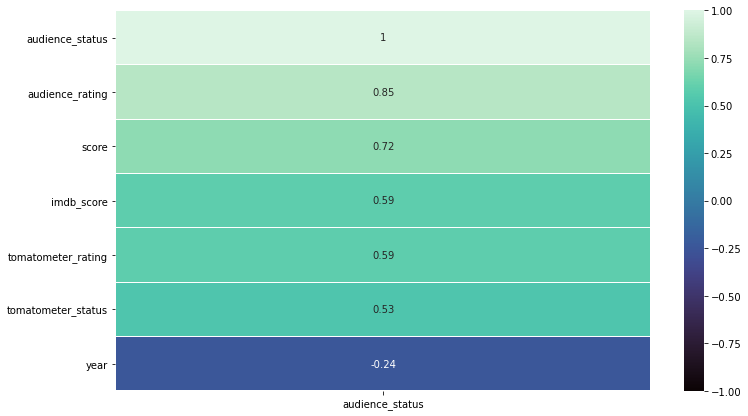

In [9]:
corr_rotten_corr = df.corr()[['audience_status']]
corr_rotten_corr = corr_rotten_corr.loc[(corr_rotten_corr['audience_status'] > 0.4) | (corr_rotten_corr['audience_status'] < -.20)]


plt.figure(figsize = (12,7))
sns.heatmap(data = (corr_rotten_corr.sort_values(by = 'audience_status', ascending = False)),
           annot = True,
           linewidths=0.1,
           yticklabels= True,
           xticklabels= True,
           cmap = 'mako',
           vmin=-1,
           vmax=1)
plt.yticks(rotation = 0);

### Setup for Modeling

In [10]:
np.random.seed(321)

In [11]:
X = df.drop(columns = ['audience_rating', 'audience_status', 'audience_count'])
y = df['audience_status']

### Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.30, random_state=321)

### Baseline

In [13]:
X_train.isnull().sum()

review_type           0
runtime               0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
critic_id             0
review_score          0
year                  0
imdb_score            0
imdb_count            0
review_negative       0
review_neutral        0
review_positive       0
review_compound       0
consensus_negative    0
consensus_neutral     0
consensus_positive    0
consensus_compound    0
score                 0
G                     0
NR                    0
PG                    0
PG-13                 0
R                     0
000                   0
10                    0
11                    0
12                    0
15                    0
1950s                 0
1960s                 0
1970s                 0
1980s                 0
20                    0
aaron                 0
abandoned             0
abigail               0
ability               0
able                  0
abraham               0
absorbing             0
accident        

In [14]:
y_test.value_counts(normalize=True)

1    0.548306
0    0.451694
Name: audience_status, dtype: float64

### Logistic Regression

In [17]:
count = 0 
lr_params = {}

In [18]:
start = time.time()
lr_params = lr_params  
count = count

lr_pipe = Pipeline([('sc', StandardScaler()),
                   ('lr', LogisticRegression())])

params = {
    'lr__penalty': ['l1', 'l2'],
    'lr__tol': [0.1, 0.01, 0.001],
    'lr__C': [2, 3],
    'lr__solver': ['saga'],
    'lr__max_iter': [5000]}

gs_lr = GridSearchCV(lr_pipe, param_grid = params, cv = 3, verbose = 1, n_jobs = 5)
gs_lr.fit(X_train, y_train)

count += 1

gs_lr.best_params_['score'] = gs_lr.best_score_ 
gs_lr.best_params_['train_score'] = gs_lr.score(X_train, y_train)
gs_lr.best_params_['test_score'] = gs_lr.score(X_test, y_test)

lr_preds = gs_lr.predict(X_test)

gs_lr.best_params_['recall']  = recall_score(y_test, lr_preds)
gs_lr.best_params_['precision'] = precision_score(y_test, lr_preds)
gs_lr.best_params_['f1_score'] = f1_score(y_test, lr_preds)

lr_params[f'lr_{count}'] = gs_lr.best_params_   

lr_df = pd.DataFrame.from_dict(lr_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

lr_df

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/jenz/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Runtime is 86.21977663040161


,lr__C,lr__max_iter,lr__penalty,lr__solver,lr__tol,score,train_score,test_score,recall,precision,f1_score
lr_1,2,5000,l1,saga,0.1,0.789589,0.924078,0.812342,0.806273,0.844444,0.824917


### KNN

In [19]:
count = 0 
knn_params = {}

In [20]:
start = time.time()
knn_params = knn_params  
count = count
knn_pipe = Pipeline([('sc', StandardScaler()),
                   ('knn', KNeighborsClassifier())])

params = {
    'knn__n_neighbors' : np.arange(1, 30, 3),
    'knn__leaf_size' : [5, 10, 20],
    'knn__metric' : ['euclidean','manhattan','minkowski']
}

gs_knn = GridSearchCV(knn_pipe, param_grid = params, cv = 3,verbose = 1, n_jobs = 4)

gs_knn.fit(X_train, y_train)

count += 1

gs_knn.best_params_['score'] = gs_knn.best_score_ 
gs_knn.best_params_['train_score'] = gs_knn.score(X_train, y_train)
gs_knn.best_params_['test_score'] = gs_knn.score(X_test, y_test)

knn_preds = gs_knn.predict(X_test)

gs_knn.best_params_['recall']  = recall_score(y_test, knn_preds)
gs_knn.best_params_['precision'] = precision_score(y_test, knn_preds)
gs_knn.best_params_['f1_score'] = f1_score(y_test, knn_preds)

knn_params[f'knn_{count}'] = gs_knn.best_params_   

knn_df = pd.DataFrame.from_dict(knn_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')
knn_df

Fitting 3 folds for each of 90 candidates, totalling 270 fits


/Users/jenz/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Runtime is 603.8045341968536


,knn__leaf_size,knn__metric,knn__n_neighbors,score,train_score,test_score,recall,precision,f1_score
knn_1,5,manhattan,28,0.67137,0.7859,0.704603,0.70941,0.740848,0.724788


### Bernoulli Naive Bayes 

In [21]:
count = 0 
nb_params = {}

In [22]:
start = time.time()
nb_params = nb_params
count = count

params = {
    'alpha' : [1,0.5,0],
    'fit_prior': [True,False]}

gs_nb = GridSearchCV(BernoulliNB(), param_grid = params, cv = 5, verbose = 1, n_jobs = 4)
gs_nb.fit(X_train, y_train)

count += 1

gs_nb.best_params_['score'] = gs_nb.best_score_ 
gs_nb.best_params_['train_score'] = gs_nb.score(X_train, y_train)
gs_nb.best_params_['test_score'] = gs_nb.score(X_test, y_test)

nb_preds = gs_nb.predict(X_test)

gs_nb.best_params_['recall']  = recall_score(y_test, nb_preds)
gs_nb.best_params_['precision'] = precision_score(y_test, nb_preds)
gs_nb.best_params_['f1_score'] = f1_score(y_test, nb_preds)

nb_params[f'nb_{count}'] = gs_nb.best_params_   

nb_df = pd.DataFrame.from_dict(nb_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

nb_df

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Runtime is 5.02878999710083


,alpha,fit_prior,score,train_score,test_score,recall,precision,f1_score
nb_1,1,True,0.718872,0.798048,0.734952,0.721402,0.778884,0.749042


### Random Forest

In [23]:
count = 0 
rf_params = {}

In [24]:
start = time.time()
rf_params = rf_params
count = count

params = {
    'n_estimators': [100,125,150],
    'max_depth': [1,5,9],
    'ccp_alpha': [0.001,0,1],
    'bootstrap': [True, False],
    'max_features': ['sqrt','log2']}

gs_rf = GridSearchCV(RandomForestClassifier(), param_grid = params, cv = 4, verbose = 1, n_jobs = 4)

gs_rf.fit(X_train, y_train)

count += 1

gs_rf.best_params_['score'] = gs_rf.best_score_ 
gs_rf.best_params_['train_score'] = gs_rf.score(X_train, y_train)
gs_rf.best_params_['test_score'] = gs_rf.score(X_test, y_test)

rf_params[f'rf_{count}'] = gs_rf.best_params_

rf_preds = gs_rf.predict(X_test)

gs_rf.best_params_['recall']  = recall_score(y_test, rf_preds)
gs_rf.best_params_['precision'] = precision_score(y_test, rf_preds)
gs_rf.best_params_['f1_score'] = f1_score(y_test, rf_preds)

rf_df = pd.DataFrame.from_dict(rf_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

rf_df

Fitting 4 folds for each of 108 candidates, totalling 432 fits
Runtime is 84.2262237071991


,bootstrap,ccp_alpha,max_depth,max_features,n_estimators,score,train_score,test_score,recall,precision,f1_score
rf_1,True,0.001,9,sqrt,125,0.833627,0.857484,0.841679,0.853321,0.857275,0.855294


### Decision Tree

In [25]:
count = 0 
dt_params = {}

In [26]:
start = time.time()
dt_params = dt_params
count = count

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [2,3,4],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [1,2],
    'ccp_alpha': [0.01, 0.1, 1]}

gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 3, verbose = 1, n_jobs = 4)

gs_dt.fit(X_train, y_train)

count += 1

gs_dt.best_params_['score'] = gs_dt.best_score_ 
gs_dt.best_params_['train_score'] = gs_dt.score(X_train, y_train)
gs_dt.best_params_['test_score'] = gs_dt.score(X_test, y_test)

dt_params[f'dt_{count}'] = gs_dt.best_params_

dt_preds = gs_dt.predict(X_test)

gs_dt.best_params_['recall']  = recall_score(y_test, dt_preds)
gs_dt.best_params_['precision'] = precision_score(y_test, dt_preds)
gs_dt.best_params_['f1_score'] = f1_score(y_test, dt_preds)

dt_df = pd.DataFrame.from_dict(dt_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

dt_df

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Runtime is 40.067748069763184


,ccp_alpha,criterion,max_depth,min_samples_leaf,min_samples_split,score,train_score,test_score,recall,precision,f1_score
dt_1,0.01,entropy,4,1,3,0.855532,0.866594,0.859383,0.811808,0.922432,0.863592


### SVC
This took 51 min. So not going to run again. 

In [43]:
count = 0 
svc_params = {}

In [44]:
start = time.time()
svc_params = svc_params
count = count

svc_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('svc', SVC())
])

params = {
    'svc__C' : np.linspace(1, 30, 20),
    'svc__kernel' : ['poly'],
    'svc__degree' : [1,2],
}

gs_svc = GridSearchCV(svc_pipe, param_grid = params, cv = 3, verbose = 1, n_jobs = 4)
gs_svc.fit(X_train, y_train)

count += 1

gs_svc.best_params_['score'] = gs_svc.best_score_ 
gs_svc.best_params_['train_score'] = gs_svc.score(X_train, y_train)
gs_svc.best_params_['test_score'] = gs_svc.score(X_test, y_test)

svc_preds = gs_svc.predict(X_test)

gs_svc.best_params_['recall']  = recall_score(y_test, svc_preds)
gs_svc.best_params_['precision'] = precision_score(y_test, svc_preds)
gs_svc.best_params_['f1_score'] = f1_score(y_test, svc_preds)

svc_params[f'svc_{count}'] = gs_svc.best_params_   

svc_df = pd.DataFrame.from_dict(svc_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

svc_df

Fitting 3 folds for each of 40 candidates, totalling 120 fits


/Users/jenz/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Runtime is 915.409521818161


,svc__C,svc__degree,svc__kernel,score,train_score,test_score,recall,precision,f1_score
svc_1,1.0,1,poly,0.784381,0.925163,0.810319,0.829336,0.825528,0.827428


### Gradient Boost

In [27]:
count = 0 
gb_params = {}

In [28]:
start = time.time()
gb_params = gb_params
count = count

params  = {
    'learning_rate':[1,0.1,0.5],
    'n_estimators':[25, 50, 100, 150],
    'max_depth':[2,3,5]}

gs_gb = GridSearchCV(GradientBoostingClassifier() , param_grid = params, cv = 3, verbose = 1, n_jobs = 4)

gs_gb.fit(X_train, y_train)
count += 1

gs_gb.best_params_['score'] = gs_gb.best_score_ 
gs_gb.best_params_['train_score'] = gs_gb.score(X_train, y_train)
gs_gb.best_params_['test_score'] = gs_gb.score(X_test, y_test)

gb_preds = gs_gb.predict(X_test)

gs_gb.best_params_['recall']  = recall_score(y_test, gb_preds)
gs_gb.best_params_['precision'] = precision_score(y_test, gb_preds)
gs_gb.best_params_['f1_score'] = f1_score(y_test, gb_preds)

gb_params[f'gb_{count}'] = gs_gb.best_params_   

gb_df = pd.DataFrame.from_dict(gb_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

gb_df

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Runtime is 372.81107211112976


,learning_rate,max_depth,n_estimators,score,train_score,test_score,recall,precision,f1_score
gb_1,0.1,5,50,0.917574,0.963124,0.922104,0.915129,0.941176,0.92797


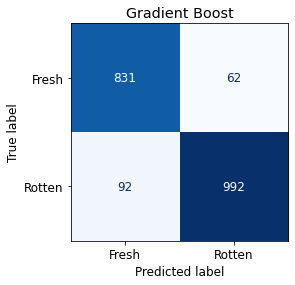

In [29]:
# Gradient Boost Confusion Matrix 
tn, fp, fn, tp = confusion_matrix(y_test, gb_preds).ravel()
plt.rcParams.update({'font.size': 12})
plot_confusion_matrix(gs_gb, X_test, y_test, cmap = 'Blues', colorbar = False, display_labels = ['Fresh','Rotten']);
plt.title('Gradient Boost');

### Bagging Classifier

In [30]:
count = 0 
bag_params = {}

In [31]:
start = time.time()
bag_params = bag_params
count = count

params = {
    'n_estimators' : [55,60,75],
    'bootstrap' : [True, False],
    'max_features' : [0.25, 0.45, 0.55]}

gs_bag = GridSearchCV(BaggingClassifier(), param_grid = params, cv = 5, verbose = 1, n_jobs = 4)

gs_bag.fit(X_train, y_train)
count += 1

gs_bag.best_params_['score'] = gs_bag.best_score_ 
gs_bag.best_params_['train_score'] = gs_bag.score(X_train, y_train)
gs_bag.best_params_['test_score'] = gs_bag.score(X_test, y_test)

bag_preds = gs_bag.predict(X_test)

gs_bag.best_params_['recall']  = recall_score(y_test, bag_preds)
gs_bag.best_params_['precision'] = precision_score(y_test, bag_preds)
gs_bag.best_params_['f1_score'] = f1_score(y_test, bag_preds)

bag_params[f'bag_{count}'] = gs_bag.best_params_   

bag_df = pd.DataFrame.from_dict(bag_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

bag_df

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Runtime is 981.0164361000061


,bootstrap,max_features,n_estimators,score,train_score,test_score,recall,precision,f1_score
bag_1,False,0.55,55,0.902386,1.0,0.905918,0.894834,0.930902,0.912512


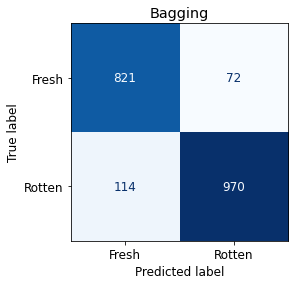

In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, bag_preds).ravel()
plt.rcParams.update({'font.size': 12})
plot_confusion_matrix(gs_bag, X_test, y_test, cmap = 'Blues', colorbar = False, display_labels = ['Fresh','Rotten']);
plt.title('Bagging');

### Ada Boost

In [35]:
# Was having some error issues, so re-instantiating X & Y 

In [36]:
X = df.drop(columns = ['audience_rating', 'audience_status', 'audience_count'])
y = df['audience_status']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.30, random_state=321)

In [38]:
count = 0 
ada_params = {}

In [39]:
start = time.time()
ada_params = ada_params
count = count

params = {
    'n_estimators' : [300,400,500],
    'learning_rate' : [1, 0.5, 0.1, 0.001]}

gs_ada = GridSearchCV(AdaBoostClassifier(), param_grid = params, cv = 5, verbose = 1, n_jobs = 4)

gs_ada.fit(X_train, y_train)
count += 1

gs_ada.best_params_['score'] = gs_ada.best_score_ 
gs_ada.best_params_['train_score'] = gs_ada.score(X_train, y_train)
gs_ada.best_params_['test_score'] = gs_ada.score(X_test, y_test)

ada_preds = gs_ada.predict(X_test)

gs_ada.best_params_['recall']  = recall_score(y_test, ada_preds)
gs_ada.best_params_['precision'] = precision_score(y_test, ada_preds)
gs_ada.best_params_['f1_score'] = f1_score(y_test, ada_preds)

ada_params[f'ada_{count}'] = gs_ada.best_params_   

ada_df = pd.DataFrame.from_dict(ada_params, orient = 'index')

end = time.time()
print(f'Runtime is {end - start}')

ada_df

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Runtime is 488.72347688674927


,learning_rate,n_estimators,score,train_score,test_score,recall,precision,f1_score
ada_1,0.5,500,0.889154,0.965293,0.885685,0.869004,0.918129,0.892891


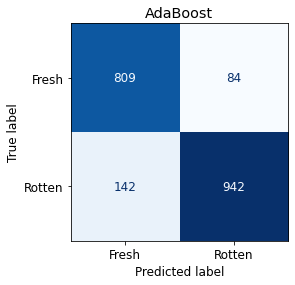

In [40]:
tn, fp, fn, tp = confusion_matrix(y_test, ada_preds).ravel()
plt.rcParams.update({'font.size': 12})
plot_confusion_matrix(gs_ada, X_test, y_test, cmap = 'Blues', colorbar = False, display_labels = ['Fresh','Rotten']);
plt.title('AdaBoost');

In [47]:
master = pd.concat([rf_df,svc_df,lr_df, dt_df, ada_df, gb_df, bag_df], join = 'outer' )
master.sort_values(by = 'test_score', ascending = False)

,bootstrap,ccp_alpha,max_depth,max_features,n_estimators,score,train_score,test_score,recall,precision,f1_score,svc__C,svc__degree,svc__kernel,lr__C,lr__max_iter,lr__penalty,lr__solver,lr__tol,criterion,min_samples_leaf,min_samples_split,learning_rate
gb_1,NaN,NaN,5.0,NaN,50.0,0.917574,0.963124,0.922104,0.915129,0.941176,0.927970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
bag_1,False,NaN,NaN,0.55,55.0,0.902386,1.000000,0.905918,0.894834,0.930902,0.912512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ada_1,NaN,NaN,NaN,NaN,500.0,0.889154,0.965293,0.885685,0.869004,0.918129,0.892891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5
dt_1,NaN,0.010,4.0,NaN,NaN,0.855532,0.866594,0.859383,0.811808,0.922432,0.863592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,entropy,1.0,3.0,NaN
rf_1,True,0.001,9.0,sqrt,125.0,0.833627,0.857484,0.841679,0.853321,0.857275,0.855294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lr_1,NaN,NaN,NaN,NaN,NaN,0.789589,0.924078,0.812342,0.806273,0.844444,0.824917,NaN,NaN,NaN,2.0,5000.0,l1,saga,0.1,NaN,NaN,NaN,NaN
svc_1,NaN,NaN,NaN,NaN,NaN,0.784381,0.925163,0.810319,0.829336,0.825528,0.827428,1.0,1.0,poly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Gradient Boosting is performing the best. Testing with polynomial features next. <br> 
Modeling with Polynomial Features can be found in 04.2_Classification_Modeling_Poly.ipynb <br>
Modeling with Neural Networks can be found in 04.3_Classification_Modeling_NN.ipynb